# Quantified Self: Intro, Aggregation, and Hypothesis Testing

## Domain Introduction

For my quanrified self project, I will be analyzing health data and screen time data from the past several months. Both of these data sets have been extracted from my phone. The health data has been measured by the iPhone's health app, and contains information on my daily steps, distance, and floors climbed. I have also added the days of the week to this data set, to allow for data analysis based on the day of the week. The screen time data was collected by the iPhone's screen time settings, but was manually input into a csv file by me, as there is no way to export a file from the iPhone. The screen time data records the amount of time I spend on my phone each day, as well as how much of that time was spent on each category of app. Here, too, I have added the days of the week for better analysis.

## Data Aggregation

To begin, I will load the two data sets into pandas data frames from their respective csv files.

In [1]:
import pandas as pd
import numpy as np

health_df = pd.read_csv("health_data.csv")
health_df = health_df.dropna(axis=0)
screen_time_df = pd.read_csv("screen_time.csv")
screen_time_df = screen_time_df.dropna(axis=0)

Now that our data sets have been loaded into data frames, we can begin to look at the data we have collected and look for any trends. We will start by grouping our data by days of the week, and looking at histograms for the mean value by weekday. The first step for this is to group our data by the day of the week.

In [2]:
health_df.describe()

,Distance (mi),Flights Climbed (count),Steps (count)
count,66.000000,66.000000,66.000000
mean,1.747074,4.393939,4030.515152
std,1.227376,4.220386,2806.700605
min,0.084637,0.000000,199.000000
25%,0.486223,0.000000,1199.750000
50%,1.854219,4.500000,4220.500000
75%,2.622152,7.000000,6010.250000
max,4.114276,16.000000,9600.000000


In [3]:
screen_time_df.describe()

,Total Time (Minutes),Games,Social,Entertainment,Utilities,Productivity & Finance,Creativity,Information & Reading,Education,Shopping & Food,Other,Unclassified
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.00000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,416.530303,40.166667,145.984848,32.666667,9.909091,12.469697,8.50000,6.348485,0.333333,1.303030,5.666667,153.227273
std,118.338526,41.734540,68.351916,44.566401,16.252552,11.481383,12.38268,13.670285,1.657926,4.318011,9.204235,102.002684
min,139.000000,0.000000,63.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,318.500000,11.000000,107.250000,6.000000,0.000000,5.250000,0.00000,0.000000,0.000000,0.000000,0.000000,74.250000
50%,447.500000,23.000000,138.500000,14.000000,2.000000,9.000000,3.00000,2.000000,0.000000,0.000000,1.000000,131.500000
75%,500.500000,61.750000,171.750000,42.500000,11.500000,16.750000,10.00000,6.000000,0.000000,0.000000,7.000000,214.750000
max,639.000000,169.000000,535.000000,210.000000,74.000000,70.000000,54.00000,82.000000,13.000000,26.000000,35.000000,482.000000


In [22]:
health_weekday_groups = health_df.groupby("Weekday")
screen_time_weekday_groups = screen_time_df.groupby("Weekday")

distance_mean_ser = pd.Series(dtype=float)
flights_mean_ser = pd.Series(dtype=float)
steps_mean_ser = pd.Series(dtype=float)

for group_name, group_df in health_weekday_groups:
    distance_mean_ser[group_name] = group_df["Distance (mi)"].mean()
    flights_mean_ser[group_name] = group_df["Flights Climbed (count)"].mean()
    steps_mean_ser[group_name] = group_df["Steps (count)"].mean()
    
total_minutes_mean_ser = pd.Series(dtype=float)
for group_name, group_df in screen_time_weekday_groups:
    total_minutes_mean_ser[group_name] = group_df["Total Time (Minutes)"].mean()


## Data Visualization

For our health data, there are not many attributes for us to examine, so we can look at data visualizations for all the attributes. Our screen time data, on the other hand, has many attributes. Before looking at the data in further detail, we will look at the overall time spent per weekday. These bar charts will be made using the `make_bar_chart()` function in `utils.py`.

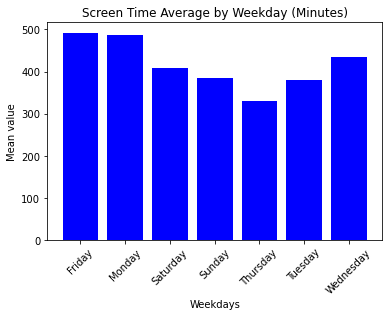

In [5]:
import utils
utils.make_bar_chart(total_minutes_mean_ser, "Screen Time Average by Weekday (Minutes)")

With this bar chart, we can see that the average screen time tends to be between 300 and 500 minutes each day, with lower values on Tuesdays and Thursdays. Mondays, Wednesdays, and Fridays have the highest values. This contrast aligns with real life circumstances: class schedules. The difference between Tuesday-Thursday classes and Monday-Wednesday-Friday schedules might allow for more free time, or might require different levels of device usage for different topics. However, there is a clear trend. Now, We will look at some visualizations for the health app data.

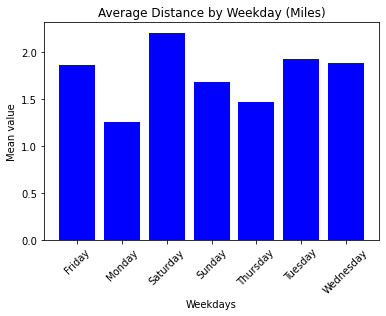

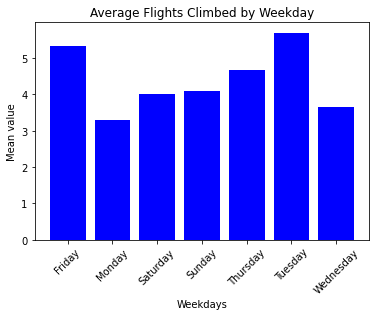

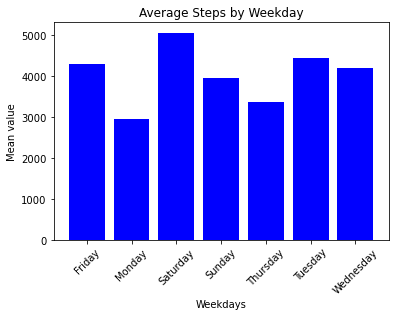

In [6]:
utils.make_bar_chart(distance_mean_ser, "Average Distance by Weekday (Miles)")
utils.make_bar_chart(flights_mean_ser, "Average Flights Climbed by Weekday")
utils.make_bar_chart(steps_mean_ser, "Average Steps by Weekday")


These bar charts are also rather telling about my class schedue. We see that Mondays have the lowest levels of activity across the board, which makes sense considering I only had one class on campus that day, with the rest being held over zoom. Tuesdays, Thursdays, and Fridays have a larger number of flights climbed, which aligns with activities on campus that only occur on those days. For instance, the stairs to physics lab and the student chapel might bring those numbers up.

## Hypothesis Testing

With this data, there is a lot of hypothesis testing that we can conduct. My overall theory regarding this project is that the less physical recorded for a day, the more digital activity ther will be. For this to be correct, Mondays, which have the lowest physical activity across the board, should have a higher level of screen time than other days. The closest bars to Monday on our screen time bar graph are Wednesdays and Fridays. Wednesdays appear to have slightly higher physical activity levels than Fridays, so we will be comparing Wednesday's and Monday's screen times to test this hypothesis. If I am correct, then the mean screen time on Mondays should be greater than that on Wednesdays.

### State the null and alternate hypothesis

**Null Hypothesis** ($H_0$): The Monday screen time mean will be less than or equal to the Wednesday screen time mean ($\mu_m <= \mu_w$)  
**Alternate Hypothesis** ($H_1$): The Monday screen time mean will be greater than the Wednesday screen time mean ($\mu_m > \mu_w$)

### Choose the level of significance

$\alpha = 0.01$

I chose this confidence level to be more sure of the results of the hypothesis testing, since the mean values depicted by the screen time bar chart appear to be very close. Having a lower level of significance means our results will have more significance. In order to reject the null hypothesis, our p value will need to be less than 0.01.

### Select the appropriate test statistic

For this test, we are working with two sets of data, which are independent of each other, and we will be testing to see if one is greater than the other. This means we are conducting a right tailed, two sample test of independent means.

### Formulate the Decision Rule

Before we find our decision rule, we need to find a critical t value. 

In [7]:
wednesday_screentime_totals = pd.Series(dtype=float) 
monday_screentime_totals = pd.Series(dtype=float)
for group_name, group_df in screen_time_weekday_groups:
    if group_name == "Monday":
        monday_screentime_totals = group_df["Total Time (Minutes)"]
    if group_name == "Wednesday":
        wednesday_screentime_totals = group_df["Total Time (Minutes)"]

#Remove instances that don't have a screen time recorded
monday_screentime_totals.dropna(inplace=True)
wednesday_screentime_totals.dropna(inplace=True)

#Calculate degrees of freedom
df = len(monday_screentime_totals) + len(wednesday_screentime_totals) - 2
print("Degrees of Freedom: ", df)


Degrees of Freedom:  17


Using degrees of freedom = 10, significance level = 0.01, and our t table, we find a critical t level of 2.764. Now we can formulate a decision rule.

If our calculated t value is greater than 2.764, then we reject the null hypothesis. The mean Monday screen time is greater than the mean Wednesday screen time.  
If our calculated t value is less than or equal to 2.764, then we fail to reject the null hypothesis. The mean Monday screen time is less than or equal to the mean Wednesday screen time.

Now that we have a decision rule, we can use scipy to make a decision.

### Make a decision

In [8]:
import scipy.stats as stats

t_crit = 2.764
alpha = 0.01

t_computed, p_value = stats.ttest_ind(monday_screentime_totals, wednesday_screentime_totals)
print("t computed: ", t_computed)

if p_value/2 < alpha: 
    print("Reject H0, p-value:", p_value/2)
else:
    print("Fail to reject H0, p-value:", p_value/2)

t computed:  1.4723444620875545
Fail to reject H0, p-value: 0.07959997810354145


We fail to reject our null hypothesis. While the bar chart seems to show that the Monday screen time mean is slightly higher than Wednesday screen time mean, the difference is not significant enough for us to say that Mondays have higher screen time overall.

This also eliminates my theory about screen time having an inverse relationship with physcial activity. From here, I will start comparing physical activity an screen time with regards to my class schedue on different weekdays.

## Analysis by Schedule

Based off of this hypothesis testing, we probably won't be able to predict the day of the week based on sreen time data. The same goes for the health data; certain days of the week are too close to clearly distinguish between them based on the data alone. However, certain days appear to have similar patterns. To look into these trends, I will group the days by my class schedule: 
- Tuesdays and Thursdays (TR)
- Mondays, Wednesdays, and Fridays (MWF)
- Saturday and Sunday (SS)

In [9]:
schedule_type = []
for weekday in screen_time_df["Weekday"]:
    if (weekday == "Monday" or weekday == "Wednesday" or weekday == "Friday"):
        schedule_type.append("MWF")
    elif (weekday == "Tuesday" or weekday == "Thursday"):
        schedule_type.append("TR")
    else:
        schedule_type.append("SS")
screen_time_df["Schedule Type"] = schedule_type
print(screen_time_df["Schedule Type"].value_counts())

schedule_type = []
for weekday in health_df["Weekday"]:
    if (weekday == "Monday" or weekday == "Wednesday" or weekday == "Friday"):
        schedule_type.append("MWF")
    elif (weekday == "Tuesday" or weekday == "Thursday"):
        schedule_type.append("TR")
    elif (weekday == "Sunday" or weekday == "Saturday"):
        schedule_type.append("SS")
health_df["Schedule Type"] = schedule_type
print(health_df["Schedule Type"].value_counts())

MWF    28
SS     19
TR     19
Name: Schedule Type, dtype: int64
MWF    28
SS     19
TR     19
Name: Schedule Type, dtype: int64


Now that we have this new attribute, we can start looking at the data by the schedule type, rather than the weekday.

In [10]:
health_schedule_groups = health_df.groupby("Schedule Type")
screen_time_schedule_groups = screen_time_df.groupby("Schedule Type")

distance_mean_ser = pd.Series(dtype = float)
flights_mean_ser = pd.Series(dtype = float)
steps_mean_ser = pd.Series(dtype = float)

for group_name, group_df in health_schedule_groups:
    distance_mean_ser[group_name] = group_df["Distance (mi)"].mean()
    flights_mean_ser[group_name] = group_df["Flights Climbed (count)"].mean()
    steps_mean_ser[group_name] = group_df["Steps (count)"].mean()
    
total_minutes_mean_ser = pd.Series(dtype = float)
for group_name, group_df in screen_time_schedule_groups:
    total_minutes_mean_ser[group_name] = group_df["Total Time (Minutes)"].mean()


Now we can visualize this data in the same way as we did before.

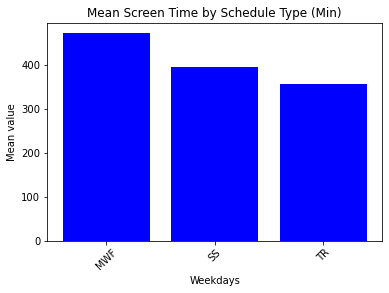

In [11]:
utils.make_bar_chart(total_minutes_mean_ser, "Mean Screen Time by Schedule Type (Min)")

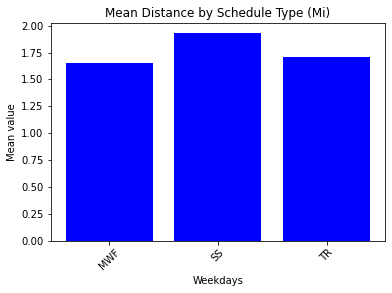

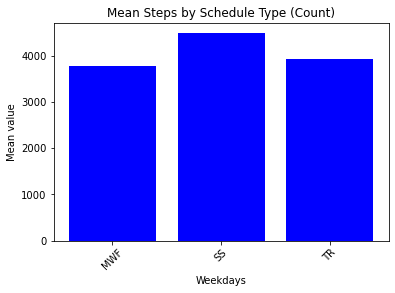

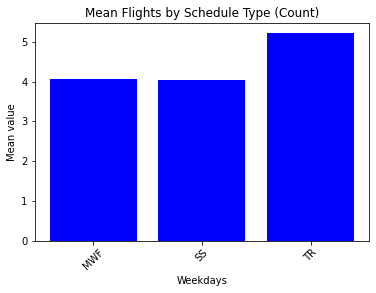

In [12]:
utils.make_bar_chart(distance_mean_ser, "Mean Distance by Schedule Type (Mi)")
utils.make_bar_chart(steps_mean_ser, "Mean Steps by Schedule Type (Count)")
utils.make_bar_chart(flights_mean_ser, "Mean Flights by Schedule Type (Count)")

Already, we can see some trends. On Tuesday/Thursday days, the number of flights of stairs I climb tends to be higher. On weekends, my average step count and distance is higher, and on Mondays, Wednesdays, and Fridays, I have a higher amount of screen time. We can see if these differences are significant by conducting another round of hypothesis testing.

### Hypothesis Testing (Round 2)

I will start by testing my hypothesis that MWF days have the highest screen time. TO do so, I will check it against SS screen time, since that has the nect highest value.

**Null Hypothesis:** MWF days have equal or less screen time than SS days.  
**Alternate Hypothesis:** MWF days have greater screen time than SS days.

$\alpha = 0.01$

For this test, we are working with two sets of data, which are independent of each other, and we will be testing to see if one is greater than the other. This means we are conducting a right tailed, two sample test of independent means.


In [13]:
MWF_screentime_totals = pd.Series(dtype=float) 
SS_screentime_totals = pd.Series(dtype=float)
for group_name, group_df in screen_time_schedule_groups:
    if group_name == "MWF":
        MWF_screentime_totals = group_df["Total Time (Minutes)"]
    if group_name == "SS":
        SS_screentime_totals = group_df["Total Time (Minutes)"]
        
#Calculate degrees of freedom
df = len(MWF_screentime_totals) + len(SS_screentime_totals) - 2
print("Degrees of Freedom: ", df)

Degrees of Freedom:  45


Using degrees of freedom = 45, significance level = 0.01, and our t table, we find a critical t level of 2.423. Now we can formulate a decision rule.

If our calculated t value is greater than 2.423, then we reject the null hypothesis. MWF screen time is greater than SS screen time.  
If our calculated t value is less than or equal to 2.423, then we fail to reject the null hypothesis. MWF screen time is less than or equal to SS screen time.

Now that we have a decision rule, we can use scipy to make a decision.

In [14]:

t_crit = 2.423
alpha = 0.01

t_computed, p_value = stats.ttest_ind(MWF_screentime_totals, SS_screentime_totals)
print("t computed: ", t_computed)

if p_value/2 < alpha: 
    print("Reject H0, p-value:", p_value/2)
else:
    print("Fail to reject H0, p-value:", p_value/2)

t computed:  2.4227632970628314
Reject H0, p-value: 0.009745245392691297


Given our results, we can reject the null hypothesis, which tells us that screen time on Mondays, Wednesdays, and Fridays  tends to be higher than on weekends, the next highest in our bar chart of mean screentime totals. 

Next, we can look at the distance of weekends (SS) compared to Tuesdays and Thursdays (TR), which have the next highest value in our bar charts. My hypothesis is that SS days will have a higher distance than TR days.

**Null Hypothesis:** SS days have equal or less distance traveled than TR days.  
**Alternate Hypothesis:** SS days have greater distance traveled than TR days.

$\alpha = 0.01$

For this test, we are working with two sets of data, which are independent of each other, and we will be testing to see if one is greater than the other. This means we are conducting a right tailed, two sample test of independent means.


In [15]:
TR_distance_totals = pd.Series(dtype=float) 
SS_distance_totals = pd.Series(dtype=float)
for group_name, group_df in health_schedule_groups:
    if group_name == "TR":
        TR_distance_totals = group_df["Distance (mi)"]
    if group_name == "SS":
        SS_distance_totals = group_df["Distance (mi)"]
        
#Calculate degrees of freedom
df = len(TR_distance_totals) + len(SS_distance_totals) - 2
print("Degrees of Freedom: ", df)

Degrees of Freedom:  36


Using degrees of freedom = 36, significance level = 0.01, and our t table, we find a critical t level of 2.434. Now we can formulate a decision rule.

If our calculated t value is greater than 2.434, then we reject the null hypothesis. SS distance is greater than TR distance.  
If our calculated t value is less than or equal to 2.434, then we fail to reject the null hypothesis. SS distance is less than or equal to TR distance.

Now that we have a decision rule, we can use scipy to make a decision.

In [16]:

t_crit = 2.434
alpha = 0.01

t_computed, p_value = stats.ttest_ind(SS_distance_totals, TR_distance_totals)
print("t computed: ", t_computed)

if p_value/2 < alpha: 
    print("Reject H0, p-value:", p_value/2)
else:
    print("Fail to reject H0, p-value:", p_value/2)

t computed:  0.5585866815780629
Fail to reject H0, p-value: 0.28995096252963787


Unfortunately, we won't be able to base much off of distance. We fail to reject the null hypothesis, so the weekend distances is less than or equal to that of Tuesdays and Thursdays.

We can quickly run through the same process regarding step counts; everything for this hypothesis test is the same, only using step counts instead of distances

In [17]:
TR_step_totals = pd.Series(dtype=float) 
SS_step_totals = pd.Series(dtype=float)
for group_name, group_df in health_schedule_groups:
    if group_name == "TR":
        TR_step_totals = group_df["Steps (count)"]
    if group_name == "SS":
        SS_step_totals = group_df["Steps (count)"]
        
#Calculate degrees of freedom
df = len(TR_step_totals) + len(SS_step_totals) - 2
print("Degrees of Freedom: ", df)


t_crit = 2.434
alpha = 0.01

t_computed, p_value = stats.ttest_ind(SS_step_totals, TR_step_totals)
print("t computed: ", t_computed)

if p_value/2 < alpha: 
    print("Reject H0, p-value:", p_value/2)
else:
    print("Fail to reject H0, p-value:", p_value/2)

Degrees of Freedom:  36
t computed:  0.6183596216451052
Fail to reject H0, p-value: 0.2701156032261972


Once again, the difference in activity between SS and TR days is insignificant in distinguishing between schedule types.

Our last round of testing regards TR days and the number of flights climbed. For this round of hypothesis testing I will be comparing TR days and SS days. My hypothesis is that TR days have a higher number of flights climbed than SS days, which is the next highest value on the respective bar graph.

**Null Hypothesis:** TR days have equal or less flights climbed than SS days.  
**Alternate Hypothesis:** TR days have greater flights climbed than SS days.

$\alpha = 0.01$

For this test, we are working with two sets of data, which are independent of each other, and we will be testing to see if one is greater than the other. This means we are conducting a right tailed, two sample test of independent means.


In [18]:
TR_flight_totals = pd.Series(dtype=float) 
SS_flight_totals = pd.Series(dtype=float)
for group_name, group_df in health_schedule_groups:
    if group_name == "TR":
        TR_flight_totals = group_df["Flights Climbed (count)"]
    if group_name == "SS":
        SS_flight_totals = group_df["Flights Climbed (count)"]
        
#Calculate degrees of freedom
df = len(TR_flight_totals) + len(SS_flight_totals) - 2
print("Degrees of Freedom: ", df)


Degrees of Freedom:  36


Using degrees of freedom = 36, significance level = 0.01, and our t table, we find a critical t level of 2.434. Now we can formulate a decision rule.

If our calculated t value is greater than 2.434, then we reject the null hypothesis. TR flights climbed is greater than SS flights climbed.  
If our calculated t value is less than or equal to 2.434, then we fail to reject the null hypothesis. TR flights climbed is less than or equal to SS flights climbed.

Now that we have a decision rule, we can use scipy to make a decision.

In [19]:
t_crit = 2.434
alpha = 0.01

t_computed, p_value = stats.ttest_ind(TR_flight_totals, SS_flight_totals)
print("t computed: ", t_computed)

if p_value/2 < alpha: 
    print("Reject H0, p-value:", p_value/2)
else:
    print("Fail to reject H0, p-value:", p_value/2)

t computed:  0.7935696459658785
Fail to reject H0, p-value: 0.21632286138007478


Once again, we fail to reject the null hypothesis, meaning that we can't say that TR days have more flights climbed than SS days. Based on these hypothesis tests, any classifiers based off of physical activity will have a hard time distinguishing the type of schedule. Hopefully, by including the data from screen_time.csv, we will be able to distinguish more clearly.

Before moving on, we'll save the edited data frames back into csv files to allow the new attributes to be used in classification.

In [20]:
screen_time_df.to_csv("revised_screen_time.csv")
health_df.to_csv("revised_health.csv")

From here, we will move onto classification.